
# Matplotlib Overview Lecture

## Introduction

Matplotlib is the "grandfather" library of data visualization with Python. It was created by John Hunter. He created it to try to replicate MatLab's (another programming language) plotting capabilities in Python. So if you happen to be familiar with matlab, matplotlib will feel natural to you.

It is an excellent 2D and 3D graphics library for generating scientific figures. 

Some of the major Pros of Matplotlib are:

* Generally easy to get started for simple plots
* Support for custom labels and texts
* Great control of every element in a figure
* High-quality output in many formats
* Very customizable in general

Matplotlib allows you to create reproducible figures programmatically. Let's learn how to use it! Before continuing this lecture, I encourage you just to explore the official Matplotlib web page: http://matplotlib.org/

## Online ressources
- https://towardsdatascience.com/the-many-ways-to-call-axes-in-matplotlib-2667a7b06e06
- https://pbpython.com/effective-matplotlib.html
- https://towardsdatascience.com/plt-xxx-or-ax-xxx-that-is-the-question-in-matplotlib-8580acf42f44

## Installation 

You'll need to install matplotlib first with either:

    conda install matplotlib
or
    pip install matplotlib
    
## Importing

pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation:

Import the `matplotlib.pyplot` module under the name `plt` (the tidy way):

In [24]:
import matplotlib.pyplot as plt

You'll also need to use this line to see plots in the notebook:

In [25]:
%matplotlib inline

That line is only for jupyter notebooks in order to dispaly figures. If you are using another editor, you'll use: **plt.show()** at the end of all your plotting commands to have the figure pop up in another window.

# Basic Example

Let's walk through a very simple example using two numpy arrays:

### Example

Let's walk through a very simple example using two numpy arrays. You can also use lists, but most likely you'll be passing numpy arrays or pandas columns (which essentially also behave like arrays).

** The data we want to plot:**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 5, 11)
y = x ** 2

In [2]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [3]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

## Basic Matplotlib Commands

We can create a very simple line plot using the following (I encourage you to pause and use Shift+Tab along the way to check out the document strings for the functions we are using).

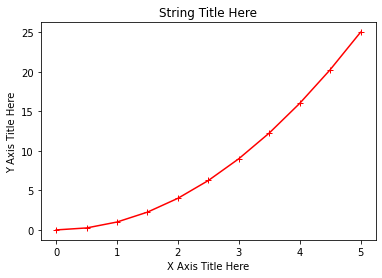

In [4]:
plt.plot(x, y, 'r-+') # 'r' is the color red and + is the form of the point
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.show()

It's as simple as calling the `plot` function with some data, and then calling the `show` function!

If the `plot` function is given one array of data, it will use it as the coordinates on the vertical axis, and it will just use each data point's index in the array as the horizontal coordinate.
In this example we have provide two arrays: one for the horizontal axis `x`, and the second for the vertical axis `y`:

The axes automatically match the extent of the data. We would like to give the graph a bit more room, so let's call the axis function to change the extent of each axis [xmin, xmax, ymin, ymax]. We can also add a grid

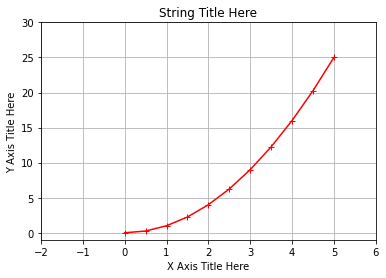

In [30]:
plt.plot(x, y, 'r-+') # 'r' is the color red and + is the form of the marker
plt.xlabel('X Axis Title Here')
plt.ylabel('Y Axis Title Here')
plt.title('String Title Here')
plt.axis([-2, 6, -1, 30]) # dimension of the axes
plt.grid(True) # display the grid
plt.show()

## Creating Multiplots on Same Canvas

By default, plt corresponds to a figure. A figure can be compared to a canva.  A matplotlib figure may contain multiple subplots (subcanvas). These subplots are organized in a grid. To create a subplot, just call the subplot function, and specify the number of rows and columns in the figure, and the index of the subplot you want to draw on (starting from 1, then left to right, and top to bottom). Note that pyplot keeps track of the currently active subplot (which you can get a reference to by calling plt.gca()), so when you call the plot function, it draws on the active subplot.

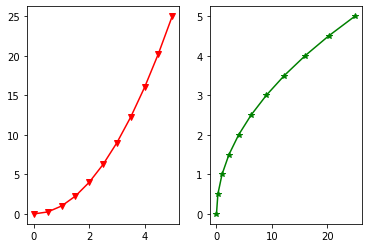

In [5]:
# Oneway:  plt.subplot(nrows, ncols, plot_number)
# Anther way:
plt.subplot(1,2,1)
plt.plot(x, y, 'r-v') # More on color options later
plt.subplot(1,2,2)
plt.plot(y, x, 'g*-');

## Multiple figures
It is also possible to draw multiple figures. Each figure may contain one or more subplots. By default, matplotlib creates `figure(1)` automatically. When you switch figure, pyplot keeps track of the currently active figure (which you can get a reference to by calling `plt.gcf()`), and the active subplot of that figure becomes the current subplot.

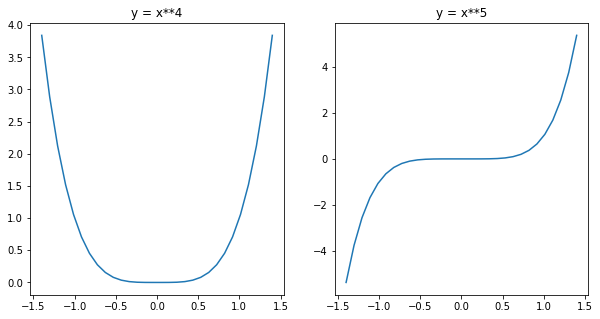

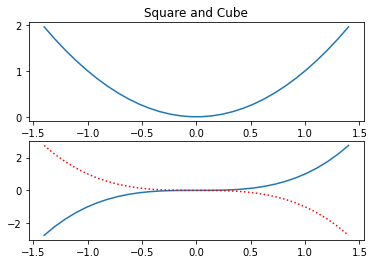

In [32]:
x = np.linspace(-1.4, 1.4, 30)

plt.figure(1)
plt.subplot(211)
plt.plot(x, x**2)
plt.title("Square and Cube")
plt.subplot(212)
plt.plot(x, x**3)

plt.figure(2, figsize=(10, 5))
plt.subplot(121)
plt.plot(x, x**4)
plt.title("y = x**4")
plt.subplot(122)
plt.plot(x, x**5)
plt.title("y = x**5")

plt.figure(1)      # back to figure 1, current subplot is 212 (bottom)
plt.plot(x, -x**3, "r:")

plt.show()

_______
______

# The Fundamentals of Matplotlib from an architecture point of view

Matplotlib can be challenging and a frustrating place for a new user. There are many different options and choosing the right one is a challenge. 

First, matplotlib has two interfaces. 
- The first is based on MATLAB and uses a state-based interface (scripting). 
- The second option is an an object-oriented interface (artist). 

As shown in Figure, there are three main layers in matplotlib architecture. From top to bottom, they are Scripting layer (matplotlib.pyplot module), Artist layer (matplotlib.artist module), and Backend layer (matplotlib.backend_bases module), respectively.

<center> <img src="images/matplotlib_archi.png" alt="drawing" width="300" class="center" /> </center>

- The Backend layer handles all the heavy works via communicating to the toolkits like wxPython or drawing languages like PostScript in your machine. It is the most complex layer. Within this layer, ``FigureCanvas`` is the area onto which the figure is drawn and ``Renderer`` is the object which knows how to draw on the ``FigureCanvas``. A regular user like you and me barely need to deal with this layer.

- In the Artist layer, you can control and fine-tune as many elements (e.g. spines, tick direction, tick label size, tick label font, tick colour etc.) as possible in the figure just like an artist paints on the canvas. This layer allows you to do more customisation compare to Scripting layer (see below) and more convenient for advanced plots. Especially when handling multiple figures/axes, you will not get confused as to which one is currently active since every subplot is assign to an ax. This is why ax.xxx() is sometimes referred to object-based plotting. `We definitely will use this layer more often when writing a web application, or a UI application, or perhaps a script to be shared with other developers.`

- The top layer, Scripting layer, where plt.xxx() resident is designed to make matplotlib work like MATLAB script. In other words, this layer is considered as the lightest scripting interface among all three layers, which comprises a collection of command style functions for a quick and easy generation of graphics and plots. This is why many matplotlib tutorials prefer to introduce from this layer. It is the easiest part to start with and use, you basically add up objects (e.g. line, text, rectangle) on top of the figure. Scripting layer plotting is sometimes also called procedural plotting.


We can say that the Scripting layer is a wrapper for the Artist layer as we can see in the next Figure
<center> <img src="images/matplotlib.png" style="height:40%;" class="center"> </center>


We recommend the following steps for learning how to use matplotlib:

1. Learn the basic matplotlib terminology, specifically what is a Figure and an Axes .
2. Always use the object-oriented interface. Get in the habit of using it from the start of your analysis.
3. Start your visualizations with basic pandas plotting.
4. Use seaborn for the more complex statistical visualizations. 
5. Use matplotlib to customize the pandas or seaborn visualization.


## Understand the different terminology of a plot (Matplotlib Anatomy)

In matplotlib, figure and axes are layers of a figure. ``Figure`` is the final image that may contain 1 or more axes. The ``Axes`` represent an individual plot. Once you understand what these are and how to access them through the object oriented API, the rest of the process starts to fall into place.


<table width="600" border="1" cellpadding="5">

<tr>

<td align="center" valign="center">
<center><img src="images/matplotlib_figure.png"></center>
</td>

<td align="center" valign="center">
<center><img src="images/matplotlib-anatomy.png"></center>
</td>

</tr>

</table>



The whole figure (marked as the outer red box) is the base of a figure. The layer above it is the axes (marked as the inner blue box). A figure can at least have one axes. `From here we know that, axes refers to a part of the figure and is not a plural word for more than one axis`. For instance, if you have one plot on a figure, then that plot is the axes. If you have multiple subplots on a figure, then each subplot is one axes.

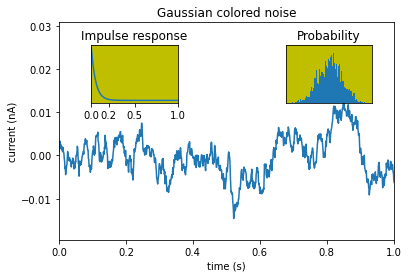

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# set up a seed to make the random result reproducible
np.random.seed(seed=666)

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05) # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# the main axes is subplot(111) by default
plt.plot(t, s)
plt.axis([0, 1, 1.1*np.min(s), 2*np.max(s)])
plt.xlabel('time (s)')
plt.ylabel('current (nA)')
plt.title('Gaussian colored noise')

# this is an inset axes over the main axes
a = plt.axes([.65, .6, .2, .2], facecolor='y')
n, bins, patches = plt.hist(s, 400, density=1)
plt.title('Probability')
plt.xticks([])
plt.yticks([])

# this is another inset axes over the main axes
a = plt.axes([0.2, 0.6, .2, .2], facecolor='y')
plt.plot(t[:len(r)], r)
plt.title('Impulse response')
plt.xlim(0, 0.2)
plt.xticks([0,.2,.5,1])
plt.yticks([])

plt.show()

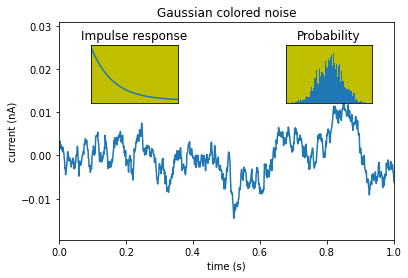

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# set up a seed to make the random result reproducible
np.random.seed(seed=666)

# create some data to use for the plot
dt = 0.001
t = np.arange(0.0, 10.0, dt)
r = np.exp(-t[:1000]/0.05) # impulse response
x = np.random.randn(len(t))
s = np.convolve(x, r)[:len(x)]*dt  # colored noise

# set up subplot axes
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_axes([0.2, 0.6, .2, .2], facecolor='y')
ax3 = fig.add_axes([.65, .6, .2, .2], facecolor='y')

# the main axes 
ax1.plot(t, s)
ax1.axis([0, 1, 1.1*np.amin(s), 2*np.amax(s)])
ax1.set_xlabel('time (s)')
ax1.set_ylabel('current (nA)')
ax1.set_title('Gaussian colored noise')

# this is another inset axes over the main axes
ax2.plot(t[:len(r)], r)
ax2.set_title('Impulse response')
ax2.set_xlim(0, 0.2)
ax2.set_xticks([])
ax2.set_yticks([])

# this is an inset axes over the main axes
n, bins, patches = ax3.hist(s, 400, density=1)
ax3.set_title('Probability')
ax3.set_xticks([])
ax3.set_yticks([])

fig.canvas.draw()

___
# Matplotlib Object Oriented Method
Now that we've seen the basics, let's break it all down with a more formal introduction of Matplotlib's Object Oriented API. This means we will instantiate figure objects and then call methods or attributes from that object.

## Introduction to the Object Oriented Method

The main idea in using the more formal Object Oriented method is to create figure objects and then just call methods or attributes of that object. This approach is nicer when dealing with a canvas that has multiple plots on it. 

To begin we create a figure instance. Then we can add axes to that figure:

Text(0.5, 1.0, 'Set Title')

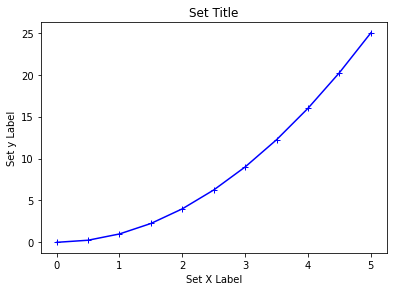

In [15]:
x = np.linspace(0, 5, 11)
y = x ** 2

# Create Figure (empty canvas)
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x, y, '+-b')
axes.set_xlabel('Set X Label') # Notice the use of set_ to begin methods
axes.set_ylabel('Set y Label')
axes.set_title('Set Title')

## Add axes 

<table width="600" border="1" cellpadding="5">

<tr>

<td align="center" valign="center">
<center><img src="images/figure_add_axes_global.jpeg"></center>
</td>

<td align="center" valign="center">
<center><img src="images/figure_add_axes.jpeg"></center>
</td>

</tr>

</table>



Code is a little more complicated, but the advantage is that we now have full control of where the plot axes are placed, and we can easily add more than one axis to the figure:

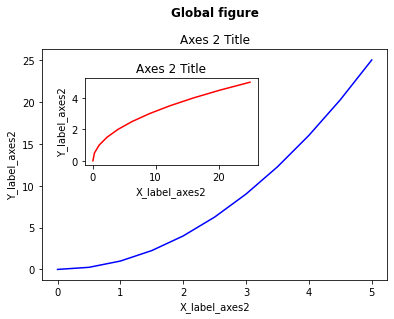

In [49]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2

# Creates blank canvas
fig = plt.figure()

fig.suptitle('Global figure', x=0.5, y=1.05, fontsize=12, fontweight='bold');

axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # main axes
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3]) # inset axes

# Larger Figure Axes 1
axes1.plot(x, y, 'b')
axes1.set_xlabel('X_label_axes2')
axes1.set_ylabel('Y_label_axes2')
axes1.set_title('Axes 2 Title')

# Insert Figure Axes 2
axes2.plot(y, x, 'r')
axes2.set_xlabel('X_label_axes2')
axes2.set_ylabel('Y_label_axes2')
axes2.set_title('Axes 2 Title');

## subplots()

The plt.subplots() object will act as a more automatic axis manager.

<center> <img src="images/subplot.jpeg" heigh=":40%" width ="600"></center>


Basic use cases:

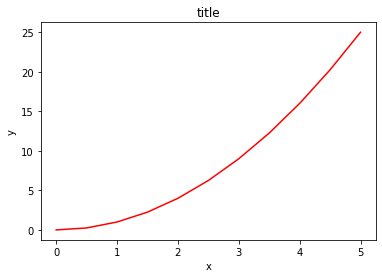

In [50]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2

# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
fig, axes = plt.subplots()

# Now use the axes object to add stuff to plot
axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

Then you can specify the number of rows and columns when creating the subplots() object:

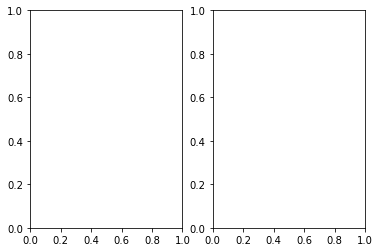

In [51]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=1, ncols=2)

In [52]:
# Axes is an array of axes to plot on
axes

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

We can iterate through this array:

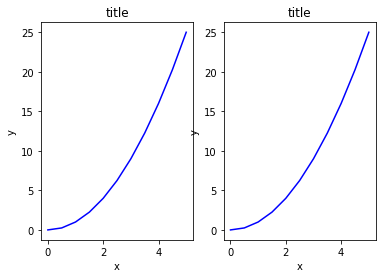

In [53]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2

for ax in axes:
    ax.plot(x, y, 'b')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

# Display the figure object    
fig

A common issue with matplolib is overlapping subplots or figures. We ca use **fig.tight_layout()** or **plt.tight_layout()** method, which automatically adjusts the positions of the axes on the figure canvas so that there is no overlapping content:

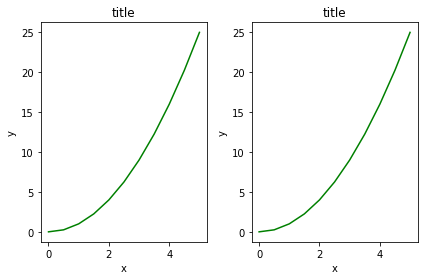

In [54]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2

fig, axes = plt.subplots(nrows=1, ncols=2)

for ax in axes:
    ax.plot(x, y, 'g')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('title')

fig    
fig.tight_layout()

### Figure size, aspect ratio and DPI

Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created. You can use the `figsize` and `dpi` keyword arguments. 
* `figsize` is a tuple of the width and height of the figure in inches
* `dpi` is the dots-per-inch (pixel per inch). 

For example:

In [33]:
fig = plt.figure(figsize=(8,4), dpi=100)

The same arguments can also be passed to layout managers, such as the `subplots` function:

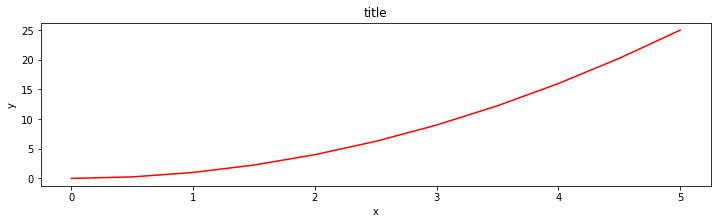

In [34]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2


fig, axes = plt.subplots(figsize=(12,3))

axes.plot(x, y, 'r')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

## Saving figures
Matplotlib can generate high-quality output in a number formats, including PNG, JPG, EPS, SVG, PGF and PDF. 

To save a figure to a file we can use the `savefig` method in the `Figure` class:

In [68]:
fig.savefig("filename.png")

Here we can also optionally specify the DPI and choose between different output formats:

In [69]:
fig.savefig("filename.png", dpi=200)

____
## Legends, labels and titles

Now that we have covered the basics of how to create a figure canvas and add axes instances to the canvas, let's look at how decorate a figure with titles, axis labels, and legends.

**Figure titles**

A title can be added to each axis instance in a figure. To set the title, use the `set_title` method in the axes instance:

In [41]:
ax.set_title("title");

**Axis labels**

Similarly, with the methods `set_xlabel` and `set_ylabel`, we can set the labels of the X and Y axes:

In [35]:
ax.set_xlabel("x")
ax.set_ylabel("y");

### Legends

You can use the **label="label text"** keyword argument when plots or other objects are added to the figure, and then using the **legend** method without arguments to add the legend to the figure: 

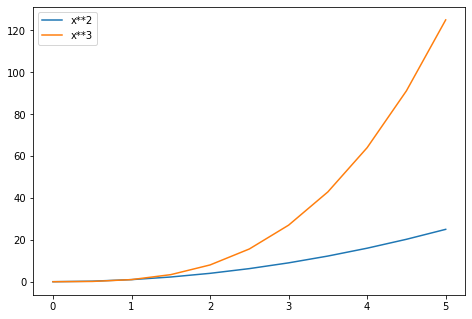

In [36]:
fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

ax.plot(x, x**2, label="x**2")
ax.plot(x, x**3, label="x**3")
ax.legend()

Notice how are legend overlaps some of the actual plot!

The **legend** function takes an optional keyword argument **loc** that can be used to specify where in the figure the legend is to be drawn. The allowed values of **loc** are numerical codes for the various places the legend can be drawn. See the [documentation page](http://matplotlib.org/users/legend_guide.html#legend-location) for details. Some of the most common **loc** values are:

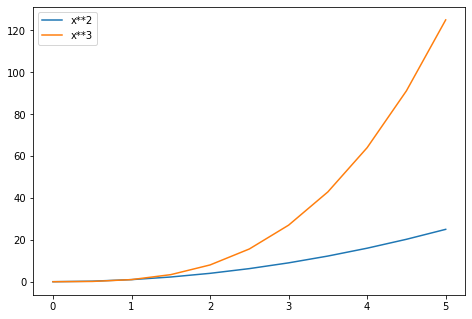

In [37]:
# Lots of options....

ax.legend(loc=1) # upper right corner
ax.legend(loc=2) # upper left corner
ax.legend(loc=3) # lower left corner
ax.legend(loc=4) # lower right corner

# .. many more options are available

# Most common to choose
ax.legend(loc=0) # let matplotlib decide the optimal location
fig

## Setting colors, linewidths, linetypes

Matplotlib gives you *a lot* of options for customizing colors, linewidths, and linetypes. 

There is the basic MATLAB like syntax (which I would suggest you avoid using for more clairty sake:

``String format of plot``

A format string consists of a part for color, marker and line::

    fmt = '[marker][line][color]'

Each of them is optional. If not provided, the value from the style
cycle is used. Exception: If ``line`` is given, but no ``marker``,
the data will be a line without markers.

Other combinations such as ``[color][marker][line]`` are also
supported, but note that their parsing may be ambiguous.

**Markers**

- ``'.'``          point marker
- ``','``          pixel marker
- ``'o'``          circle marker
- ``'v'``          triangle_down marker
- ``'^'``          triangle_up marker
- ``'<'``          triangle_left marker
- ``'>'``          triangle_right marker
- ``'1'``          tri_down marker
- ``'2'``          tri_up marker
- ``'3'``          tri_left marker
- ``'4'``          tri_right marker
- ``'s'``          square marker
- ``'p'``          pentagon marker
- ``'*'``          star marker
- ``'h'``          hexagon1 marker
- ``'H'``          hexagon2 marker
- ``'+'``          plus marker
- ``'x'``          x marker
- ``'D'``          diamond marker
- ``'d'``          thin_diamond marker
- ``'|'``          vline marker
- ``'_'``          hline marker
=============    ===============================

**Line Styles**

- ``'-'``          solid line style
- ``'--'``         dashed line style
- ``'-.'``         dash-dot line style
- ``':'``          dotted line style

Example format strings::

    - 'b'    # blue markers with default shape
    - 'or'   # red circles
    - '-g'   # green solid line
    - '--'   # dashed line with default color
    - '^k:'  # black triangle_up markers connected by a dotted line

**Colors**

- ``'b'``          blue
- ``'g'``          green
- ``'r'``          red
- ``'c'``          cyan
- ``'m'``          magenta
- ``'y'``          yellow
- ``'k'``          black
- ``'w'``          white

You can plot multiple lines on one graph very simply: just pass `x1, y1, [style1], x2, y2, [style2], ...`

For example:

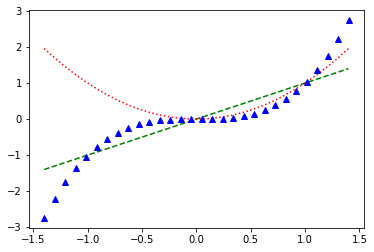

In [22]:
z = np.linspace(-1.4, 1.4, 30)
plt.plot(z, z, 'g--', z, z**2, 'r:', z, z**3, 'b^')
plt.show()

### Colors with MatLab like syntax

With matplotlib, we can define the colors of lines and other graphical elements in a number of ways. First of all, we can use the MATLAB-like syntax where `'b'` means blue, `'g'` means green, etc. The MATLAB API for selecting line styles are also supported: where, for example, 'b.-' means a blue line with dots:

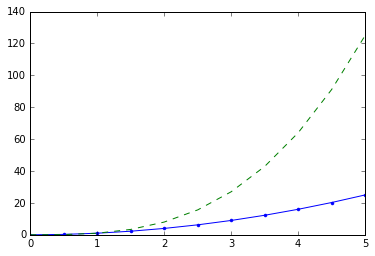

In [54]:
# MATLAB style line color and style 
fig, ax = plt.subplots()
ax.plot(x, x**2, 'b.-') # blue line with dots
ax.plot(x, x**3, 'g--') # green dashed line

### Colors with the color= parameter

We can also define colors by their names or RGB hex codes and optionally provide an alpha value using the `color` and `alpha` keyword arguments. Alpha indicates opacity.

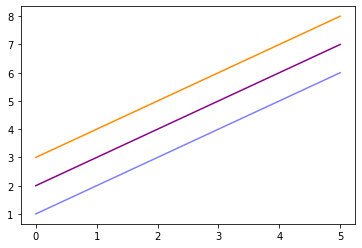

In [38]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2

fig, ax = plt.subplots()

ax.plot(x, x+1, color="blue", alpha=0.5) # half-transparant
ax.plot(x, x+2, color="#8B008B")        # RGB hex code
ax.plot(x, x+3, color="#FF8C00")        # RGB hex code 

### Line and marker styles

To change the line width, we can use the `linewidth` or `lw` keyword argument. The line style can be selected using the `linestyle` or `ls` keyword arguments:

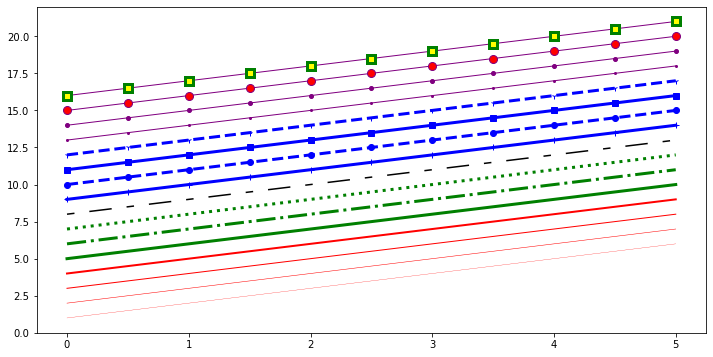

In [39]:
# Data to plot
x = np.linspace(0, 5, 11)
y = x ** 2


fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, x+1, color="red", linewidth=0.25)
ax.plot(x, x+2, color="red", linewidth=0.50)
ax.plot(x, x+3, color="red", linewidth=1.00)
ax.plot(x, x+4, color="red", linewidth=2.00)

# possible linestype options ‘-‘, ‘–’, ‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, color="green", lw=3, linestyle='-')
ax.plot(x, x+6, color="green", lw=3, ls='-.')
ax.plot(x, x+7, color="green", lw=3, ls=':')

# custom dash
line, = ax.plot(x, x+8, color="black", lw=1.50)
line.set_dashes([5, 10, 15, 10]) # format: line length, space length, ...

# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, color="blue", lw=3, ls='-', marker='+')
ax.plot(x, x+10, color="blue", lw=3, ls='--', marker='o')
ax.plot(x, x+11, color="blue", lw=3, ls='-', marker='s')
ax.plot(x, x+12, color="blue", lw=3, ls='--', marker='1')

# marker size and color
ax.plot(x, x+13, color="purple", lw=1, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color="purple", lw=1, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color="purple", lw=1, ls='-', marker='o', markersize=8, markerfacecolor="red")
ax.plot(x, x+16, color="purple", lw=1, ls='-', marker='s', markersize=8, 
        markerfacecolor="yellow", markeredgewidth=3, markeredgecolor="green");

### Control over axis appearance

In this section we will look at controlling axis sizing properties in a matplotlib figure.

## Plot range

We can configure the ranges of the axes using the `set_ylim` and `set_xlim` methods in the axis object, or `axis('tight')` for automatically getting "tightly fitted" axes ranges:

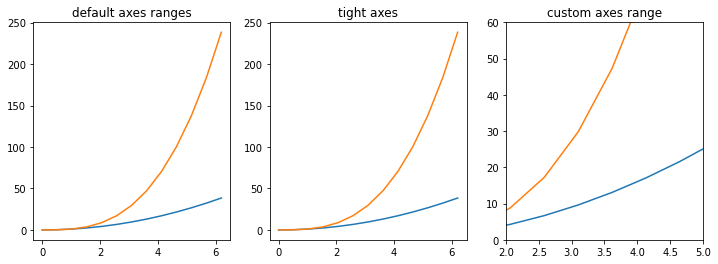

In [45]:
# Data to plot
x = np.linspace(0, 6.2, 13)
y = x ** 2


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title("default axes ranges")

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title("tight axes")

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title("custom axes range");
#axes[2].axis([1,5,0,50])

# Special Plot Types

There are many specialized plots we can create, such as barplots, histograms, scatter plots, and much more. Most of these type of plots we will actually create using seaborn, a statistical plotting library for Python. But here are a few examples of these type of plots:

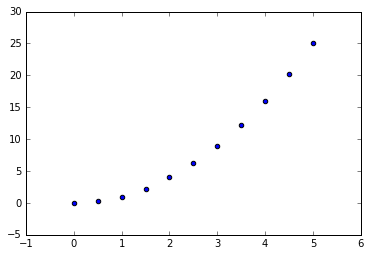

In [60]:
plt.scatter(x,y)

(array([ 14.,  11.,   9.,  12.,   6.,   7.,  13.,  13.,   6.,   9.]),
 array([  28. ,  123.5,  219. ,  314.5,  410. ,  505.5,  601. ,  696.5,
         792. ,  887.5,  983. ]),
 <a list of 10 Patch objects>)

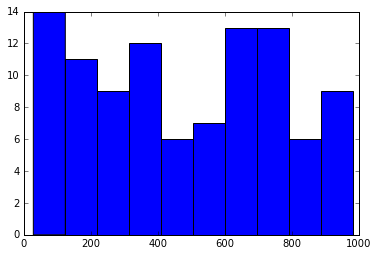

In [65]:
from random import sample
data = sample(range(1, 1000), 100)
plt.hist(data)

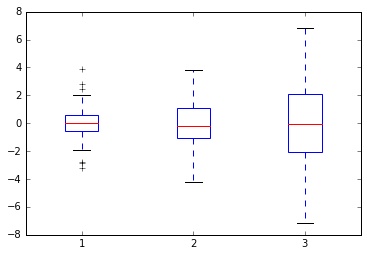

In [69]:
data = [np.random.normal(0, std, 100) for std in range(1, 4)]

# rectangular box plot
plt.boxplot(data,vert=True,patch_artist=True);   

## Further reading

* http://www.matplotlib.org - The project web page for matplotlib.
* https://github.com/matplotlib/matplotlib - The source code for matplotlib.
* http://matplotlib.org/gallery.html - A large gallery showcaseing various types of plots matplotlib can create. Highly recommended! 
* http://www.loria.fr/~rougier/teaching/matplotlib - A good matplotlib tutorial.
* http://scipy-lectures.github.io/matplotlib/matplotlib.html - Another good matplotlib reference.
